# HR Analytics - Employee Performance & Retention Analysis

## 1. Problem Statement

The objective of this project is to analyse HR data to assess employee performance, identify trends influencing retention, and provide actionable recommendations to improve employee productivity and reduce turnover.

Specifically, this project aims to:
- Identify performance patterns based on factors such as age, education, department, and training.
- Examine retention trends based on employee characteristics including tenure, performance ratings, and awards.
- Analyse relationships between key employee metrics to recommend strategies for improving employee engagement and retention.

## 2. Importing Libraries & Loading Dataset

In [2]:
import pandas as pd
df = pd.read_csv(r'D:\Projects\employees_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [22]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [23]:
df.shape

(17417, 13)

## 3. Dataset Overview

**Source:**  
The dataset is sourced from Internshala Trainings – HR Analytics Case Study and provided in CSV (.csv) format.

**Dataset Shape:**  
- **Records:** 17,417 employees  
- **Features:** 13 columns  

**Column Summary:**
- `employee_id`: Unique employee identifier
- `department`: Employee’s department
- `region`: Employee location/region code
- `education`: Education qualification
- `gender`: Employee gender
- `recruitment_channel`: Hiring source
- `no_of_trainings`: Trainings completed in one year
- `age`: Employee age
- `previous_year_rating`: Last year's performance rating (1–5)
- `length_of_service`: Work tenure in years
- `KPIs_met_more_than_80`: KPI performance above 80% (0/1)
- `awards_won`: Awards received (0/1)
- `avg_training_score`: Training score out of 100


## 4. Data Quality & Preprocessing

### 4.1 Missing Values Check

In [24]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [25]:
# Checking percentage of missing values in each column
(df.isna().sum())/len(df)*100

employee_id              0.000000
department               0.000000
region                   0.000000
education                4.426710
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.825688
length_of_service        0.000000
KPIs_met_more_than_80    0.000000
awards_won               0.000000
avg_training_score       0.000000
dtype: float64

In [26]:
# Filling missing categorical values with mode
df['education']=df['education'].fillna(df['education'].mode()[0])

In [27]:
# Filling missing numerical values with median
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].median())

In [28]:
df.isna().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              17417 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   17417 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


### 4.2 Handling duplicates

In [31]:
df.duplicated().sum()

np.int64(2)

In [33]:
#The dataset contained 2 duplicate records
df=df.drop_duplicates()

In [34]:
df.duplicated().sum()

np.int64(0)

### 4.3 Data Types Fix

In [39]:
df.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met_more_than_80      int64
awards_won                 int64
avg_training_score         int64
dtype: object

In [40]:
# Converting rating to integer (was float due to previous NaN values)
df['previous_year_rating'] = df['previous_year_rating'].astype(int)

In [41]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating      int64
length_of_service         int64
KPIs_met_more_than_80     int64
awards_won                int64
avg_training_score        int64
dtype: object

---
### 4.1 Missing Values Handling
- `education` had ~4.4% missing → filled with mode
- `previous_year_rating` had ~7.8% missing → filled with median
- No missing values remain after cleaning

### 4.2 Duplicate Records
- Found **2 duplicate rows** → removed using drop_duplicates()
- Rechecked → 0 duplicates left

### 4.3 Data Type Fix
- `previous_year_rating` converted from float → int (1–5 scale)
- Other object columns kept as object (sufficient for EDA)

---

### ✔️ Status: Cleaning Complete
- No missing values
- No duplicates
- Corrected data type
- Ready for EDA



---
## 5: Exploratory Data Analysis (EDA)

### 5.1 Univariate Analysis

#### 5.1.1 Categorical Columns
Columns considered: department, education, recruitment_channel, gender, region

In [48]:
# Checking distribution of main categorical columns
print("Department: ",df['department'].value_counts().sort_values(ascending=False))
print("\nEducation: ",df['education'].value_counts().sort_values(ascending=False))
print("\nRecruitment Channel: ",df['recruitment_channel'].value_counts().sort_values(ascending=False))
print("\nGender: ",df['gender'].value_counts())


Department:  department
Sales & Marketing    5458
Operations           3524
Procurement          2240
Technology           2199
Analytics            1697
HR                    831
Finance               802
Legal                 332
R&D                   332
Name: count, dtype: int64

Education:  education
Bachelors          12288
Masters & above     4841
Below Secondary      286
Name: count, dtype: int64

Recruitment Channel:  recruitment_channel
other       9749
sourcing    7349
referred     317
Name: count, dtype: int64

Gender:  gender
m    12312
f     5103
Name: count, dtype: int64


---
### 5.1.1 Categorical Column Insights
- The department with the highest employee count is 5458
- The most common education level is Bachelors
- The primary recruitment channel is other channel
- Gender distribution shows Male is higher


---
### 5.1.2 Numerical Columns Summary
(Understanding key numerical features: age, avg_training_score, previous_year_rating, length_of_service, no_of_trainings)


In [52]:
# Summary of numerical columns
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000
mean,39082.285214,1.250761,34.807982,3.318691,5.801493,0.358886,0.023371,63.177720
std,22708.049139,0.595720,7.694464,1.218216,4.175632,0.479687,0.151082,13.418314
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19280.500000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39115.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [53]:
print("Age Summary:\n", df['age'].describe())
print("\nTraining Score Summary:\n", df['avg_training_score'].describe())
print("\nPrevious Year Rating Summary:\n", df['previous_year_rating'].describe())
print("\nYears of Service Summary:\n", df['length_of_service'].describe())
print("\nNumber of Trainings Summary:\n", df['no_of_trainings'].describe())

Age Summary:
 count    17415.000000
mean        34.807982
std          7.694464
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

Training Score Summary:
 count    17415.000000
mean        63.177720
std         13.418314
min         39.000000
25%         51.000000
50%         60.000000
75%         75.000000
max         99.000000
Name: avg_training_score, dtype: float64

Previous Year Rating Summary:
 count    17415.000000
mean         3.318691
std          1.218216
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

Years of Service Summary:
 count    17415.000000
mean         5.801493
std          4.175632
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         34.000000
Name: length_of_service, dtype: float64

Number of Trainings Summary:
 count    17415.

In [55]:
df['no_of_trainings'].value_counts()

no_of_trainings
1    14059
2     2628
3      539
4      137
5       26
6       16
7        6
8        2
9        2
Name: count, dtype: int64

In [57]:
(df['no_of_trainings'] > 5).sum()

np.int64(26)

In [58]:
df['KPIs_met_more_than_80'].value_counts()

KPIs_met_more_than_80
0    11165
1     6250
Name: count, dtype: int64

In [61]:
df['KPIs_met_more_than_80'].describe()

count    17415.000000
mean         0.358886
std          0.479687
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: KPIs_met_more_than_80, dtype: float64

---
### 5.1.2 Numerical Column Insights

- **Employee Age:** The average age is ~35 years, with most employees between **29 to 39 years**, indicating a mid-career workforce.
- **Length of Service:** Median service length is **5 years**, suggesting employees typically stay around 3–7 years in the organization.
- **Training Count:** Most employees attend **1 training per year**. Only 26 employees are taking more than 5 trainings, indicating limited advanced skill development participation.
- **Training Score:** The average training score is **63**, with most employees scoring between **51 to 75**, showing moderate training performance.
- **Performance Rating:** Previous year ratings mostly fall between **3 to 4**, meaning the overall performance level is average to good.
- **Awards:** Very few employees have won awards (**only ~2%**), indicating reward/recognition is limited.
- **KPI Achievement:** ~35% of employees achieved KPI scores above 80%, showing a limited high-performance group.


### Insight: KPI Performance
From the distribution of the `KPIs_met_more_than_80` column:

- **0 (Not Met): 11,165 employees**
- **1 (Met): 6,250 employees**

🔍 **Key Understanding**
- Only about **36% of employees** meet more than 80% of KPI targets.
- Nearly **64% fail to meet** this benchmark, indicating a performance gap.
- This may be linked to training effectiveness, skill alignment, or workload challenges.

💡 **Conclusion**
A majority of employees are underperforming based on KPI expectations, which could impact productivity and retention. Further analysis by department, tenure, and training could reveal improvement areas.


### 5.2 Bivariate Analysis


#### 5.2.1: KPI vs Number of Trainings

In [62]:
# Average trainings taken by KPI groups (0 = Not met, 1 = Met)
df.groupby('KPIs_met_more_than_80')['no_of_trainings'].mean()


KPIs_met_more_than_80
0    1.270846
1    1.214880
Name: no_of_trainings, dtype: float64

---
### Insight: KPI Achievement vs Training Participation
From the analysis, employees who **met KPI > 80%** attended an average of **1.21 trainings**, while those who **did not meet KPIs** attended **1.27 trainings**.

📌 This suggests:
- Simply attending more trainings is **not leading to better KPI performance**.
- The effectiveness or quality of training may need improvement.
- KPI performance may depend more on skill alignment, workload, experience, or other factors.

🟡 Conclusion: Increasing training count alone may not improve KPI performance. Training structure and relevance need review.


---
### 5.2.2 KPI vs Length of Service


In [3]:
df.groupby('KPIs_met_more_than_80')['length_of_service'].mean()

KPIs_met_more_than_80
0    6.050506
1    5.357600
Name: length_of_service, dtype: float64

---
### Insight: KPI vs Length of Service
- KPI non-achievers have an average service length of **~6.05 years**
- KPI achievers have an average service length of **~5.35 years**
- Longer experience is **not directly linked** to better KPI performance
- This indicates that performance improvement may require better learning pathways, role alignment, or motivation rather than just tenure

📌 Conclusion: Experience alone does not drive performance — skills and engagement matter more.


---
### 5.2.3 KPI vs Training Score

In [4]:
df.groupby('KPIs_met_more_than_80')['avg_training_score'].mean()

KPIs_met_more_than_80
0    62.454106
1    64.466720
Name: avg_training_score, dtype: float64

---
### Insight: KPI vs Training Score
- KPI achievers have an average training score of **~64.47**
- KPI non-achievers average **~62.45**
- This shows a small positive link between training performance and KPI success.
- However, the difference is not large, meaning better scores alone do not strongly guarantee KPI achievement.

📌 Conclusion: Training quality matters, but performance improvement may require better skill alignment, mentoring, and personalized development plans.

---


### 5.2.4 KPI vs Department

In [6]:
df.groupby('KPIs_met_more_than_80')['department'].value_counts()

KPIs_met_more_than_80  department       
0                      Sales & Marketing    3945
                       Operations           1971
                       Technology           1416
                       Procurement          1404
                       Analytics            1018
                       HR                    533
                       Finance               483
                       Legal                 214
                       R&D                   183
1                      Operations           1553
                       Sales & Marketing    1513
                       Procurement           836
                       Technology            783
                       Analytics             679
                       Finance               319
                       HR                    300
                       R&D                   149
                       Legal                 118
Name: count, dtype: int64

In [14]:
# KPI percentage per department
dept_kpi_percentage = (pd.crosstab(df['department'], df['KPIs_met_more_than_80'], normalize='index') * 100)
dept_kpi_percentage


KPIs_met_more_than_80,0,1
department,,
Analytics,59.988214,40.011786
Finance,60.224439,39.775561
HR,63.985594,36.014406
Legal,64.457831,35.542169
Operations,55.930760,44.069240
Procurement,62.678571,37.321429
R&D,55.120482,44.879518
Sales & Marketing,72.279223,27.720777
Technology,64.392906,35.607094


---
### Insight: KPI% by Department (Performance Quality)
- **R&D (44.88%) and Operations (44.06%)** show the best performance consistency.
- **Sales & Marketing has the lowest KPI success rate (27.72%)** despite having the highest employee count, indicating workload/target challenges.
- **HR, Legal, and Technology** fall in the low-performance category (< 37% KPI success).
- This suggests a need for more focused training, role alignment, and performance support in customer-facing and support departments.

📌 Conclusion:
Employee performance is strongly influenced by department role complexity and workload, not just experience or training count.


### 📌 Assumptions & Benchmark Notes
- The following KPI percentage ranges are used only for analytical interpretation:
  - ⭐ Above 40% = Good performance consistency
  - ⚠️ 35% – 40% = Average / requires investigation
  - 🚩 Below 35% = Performance issue / improvement needed
- These thresholds are analytical assumptions, not universal company rules.
- Actual KPI targets may vary based on industry, business goals, and role difficulty.
- Percentages are used for fair comparison because department sizes are different.
- Counts show volume, while percentages show performance *quality* — both are needed.

---

### 5.2.5 KPI vs avg_training_score

In [18]:
avg_training_score_kpi_percentage=(pd.crosstab(df['avg_training_score'], df['KPIs_met_more_than_80'], normalize='index') * 100).head(10)
avg_training_score_kpi_percentage

KPIs_met_more_than_80,0,1
avg_training_score,,
39,100.000000,0.000000
40,100.000000,0.000000
41,71.428571,28.571429
42,83.333333,16.666667
43,69.565217,30.434783
44,73.170732,26.829268
45,72.653061,27.346939
46,72.965879,27.034121
47,67.226891,32.773109


---
### Insight: KPI % by Training Score
The crosstab analysis shows a clear skill–performance pattern:
- Employees scoring **below 40** in training have a **0% KPI success rate**
- Scores between **41 to 48** show only **16%–33% KPI success**, indicating weak performance
- This suggests that low training performance strongly correlates with low KPI results

📌 Conclusion:
Training score is an early performance indicator — employees with low scores need targeted training or mentoring to meet KPI expectations.


---
### 5.2.6 KPI vs Education

In [20]:
df.groupby('KPIs_met_more_than_80')['education'].value_counts()

KPIs_met_more_than_80  education      
0                      Bachelors          7396
                       Masters & above    3058
                       Below Secondary     153
1                      Bachelors          4123
                       Masters & above    1783
                       Below Secondary     133
Name: count, dtype: int64

In [22]:
pd.crosstab(df['education'], df['KPIs_met_more_than_80'], normalize='index') * 100
#KPI success % by each education level

KPIs_met_more_than_80,0,1
education,,
Bachelors,64.206962,35.793038
Below Secondary,53.496503,46.503497
Masters & above,63.168767,36.831233


---
### Insight: KPI vs Education
- KPI success is **highest among employees with Below Secondary education (~46.5%)**, suggesting practical skill alignment or role suitability.
- Employees with **Masters & above have slightly higher KPI success (~36.8%)** than Bachelors (~35.8%), but the difference is not very large.
- Since Bachelors form the largest employee group and show lower KPI success, focused training and skill development may be required for them.

📌 Conclusion:
Educational qualification alone does not determine performance. 
Skill alignment, job fit, and training quality appear to have a bigger impact on KPIs than degree level.


### 5.2.7 KPI vs Recruitment Channel

In [26]:
df['recruitment_channel'].value_counts()

recruitment_channel
other       9751
sourcing    7349
referred     317
Name: count, dtype: int64

In [25]:
df.groupby('recruitment_channel')['KPIs_met_more_than_80'].mean() * 100

recruitment_channel
other       35.380987
referred    53.312303
sourcing    35.800789
Name: KPIs_met_more_than_80, dtype: float64

---
### Insight: KPI vs Recruitment Channel
- **Referred employees have the highest KPI success rate (53.31%)**, indicating strong cultural and skill fit.
- **Sourcing (35.80%) and Other hiring channels (35.38%)** show significantly lower performance, suggesting weaker alignment or screening gaps.
- The "Other" channel hires the largest number of employees (9751), but performance remains low, making it a high-volume but low-efficiency channel.
- 📌 Note: Referred employees may receive informal support and faster cultural adaptation, 
which can contribute to higher KPI performance. This is a behavioral assumption, not a proven rule.


📌 Conclusion:
Referral hiring appears to produce higher-performing employees. 
Improving sourcing quality and reviewing "Other" channel screening could improve KPI outcomes and workforce quality.


## 5.3 Retention Analysis (Based on Length of Service & Engagement Factors)

### 5.3.1 Retention by Department (Length of Service)

In [28]:
dept_retention = df.groupby('department')['length_of_service'].mean().sort_values(ascending=False)
dept_retention

department
Operations           6.429342
Procurement          6.187500
Technology           5.844020
Sales & Marketing    5.753023
HR                   5.637455
Finance              5.009975
Analytics            4.998232
R&D                  4.798193
Legal                4.500000
Name: length_of_service, dtype: float64

### Insight: Retention by Department
- Highest retention is seen in **Operations (6.42 years)** and **Procurement (6.18 years)**, indicating stable workforce and stronger long-term employee commitment.
- Departments with mid-level retention (~5.5–5.8 years) include Technology, Sales & Marketing, and HR, showing average stability.
- Lowest retention is found in **Legal (4.5 years), R&D (4.79 years), Analytics (5.0 years), and Finance (5.0 years)**, suggesting potential workload pressure or role misalignment.

📌 Conclusion:
Retention is not consistent across departments. Operational and procurement roles retain employees longer, while technical, analytical, and legal roles may require retention-focused strategies.


---
### 5.3.2 Retention by Education

In [29]:
edu_retention=df.groupby('education')['length_of_service'].mean().sort_values(ascending=False)
edu_retention

education
Masters & above    7.373270
Bachelors          5.343780
Below Secondary    1.762238
Name: length_of_service, dtype: float64

---
### Insight: Retention by Education
- Employees with **Masters & above stay the longest (7.37 years)**, suggesting stronger career alignment and growth opportunities.
- Employees with **Bachelors stay for an average of ~5.34 years**, indicating moderate retention and possible job switching for better roles.
- Employees with **Below Secondary education show very low retention (1.76 years)**, suggesting job instability, skill mismatch, or limited engagement.

📌 Conclusion:
Retention increases with education level. However, education alone does not guarantee performance — job fit and development opportunities influence how long employees stay.


---
- Highly educated employees stay longer, but they don’t always perform the best.
- Lower-educated employees perform well in some cases, but don’t stay long.
- Bachelors are the largest group with middle retention + middle performance.

---
### 5.3.3 Retention by Awards (Engagement Indicator)

In [33]:
df.groupby('awards_won')['length_of_service'].mean()

awards_won
0    5.827219
1    4.742015
Name: length_of_service, dtype: float64

---
### Insight: Retention by Awards
Employees who **did not receive awards stay longer** (5.83 years), while award-winning employees stay for a shorter duration (4.74 years). This suggests that top performers may be leaving earlier, possibly due to better opportunities, unmet career expectations, workload pressure, or limited internal growth.

📌 Conclusion:
Recognition alone is not improving retention. Awarded employees may need better career paths, role clarity, and compensation alignment to remain in the company.


---
### 5.3.4 Retention vs KPI Summary


### Insight: Retention vs KPI Summary
- High KPI performers (80%+) stay for **~5.35 years** on average.
- Low KPI performers (<80%) stay for **~6.05 years** on average.
- This indicates that **high performers are not staying as long as expected**, while average performers remain longer.

📌 Interpretation:
Top performers may be leaving due to workload pressure, lack of advancement, or better external opportunities. 
Meanwhile, lower performers may stay due to job security comfort, fewer expectations, or limited alternatives.

💡 Meaning for HR:
The company is **recognizing performance, but not retaining performance**. 
Improving growth paths, promotions, and incentives for high performers can help maintain talent.


---
## 6. Recommendations (Based on Insights)


### 🏆 A. Performance Improvement
1. Implement targeted training programs for employees scoring below 60 in training score.
2. Introduce skill-based training for Sales & Marketing and Legal departments (low KPI + low retention).
3. Add refresher training after 6 months to improve KPI for existing employees.


### 📚 B. Training & Skill Development Strategy
1. Quality over quantity: Focus on improving training effectiveness, not increasing session count.
2. Create personalized learning paths for Bachelors group (largest group + average performance).
3. Add role-specific onboarding for below secondary employees to reduce early exits.



### 💼 C. Hiring Strategy
1. Increase referral hiring for critical roles to improve quality and cultural fit.
2. Review screening criteria for the “Other” recruitment channel to avoid mismatched hiring.
3. Improve sourcing channel process with skill tests + culture-fit checks.


### 🤝 D. Retention & Engagement Strategy
1. Introduce a growth path / promotion track for KPI achievers to retain top talent.
2. Link awards with benefits (salary increments, opportunities, leadership training).
3. Start stay-interviews for high performers to understand dissatisfaction before they exit.



### 🏢 E. Department Focus
- **Operations & Procurement** → Maintain strategy (good retention)
- **Legal, R&D, Analytics** → Workload review + mentorship needed
- **Sales & Marketing** → KPI improvement + performance coaching


These recommendations align training, retention, and hiring strategy to improve 
overall workforce stability, performance outcomes, and organizational productivity.


---
## 7. Visualizations (Supporting Insights)


### 7.1 KPI Achievement Distribution

In [42]:
import matplotlib.pyplot as plt

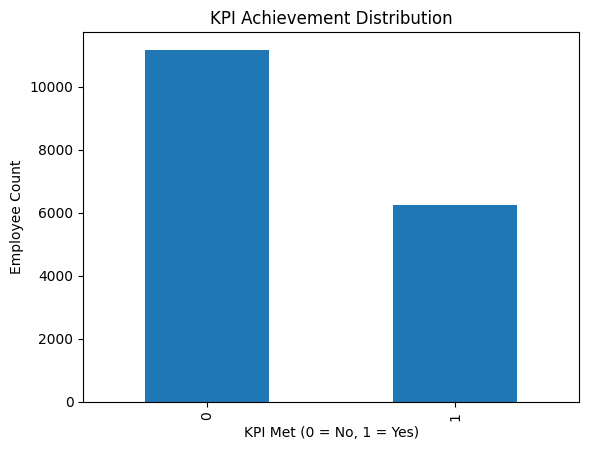

In [43]:
df['KPIs_met_more_than_80'].value_counts().plot(kind='bar')
plt.title('KPI Achievement Distribution')
plt.xlabel('KPI Met (0 = No, 1 = Yes)')
plt.ylabel('Employee Count')
plt.show()


---
### 7.2 KPI Performance by Recruitment Channel

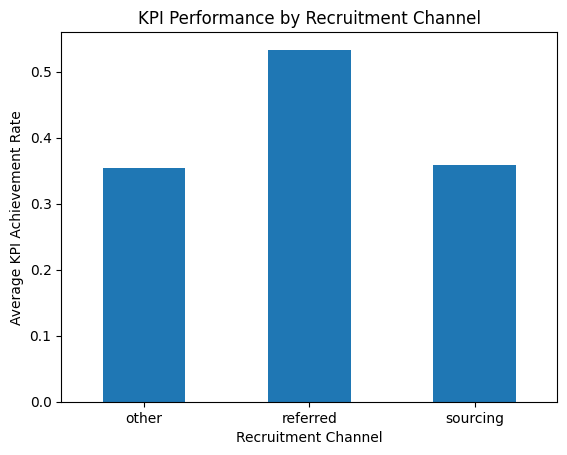

In [52]:
df.groupby('recruitment_channel')['KPIs_met_more_than_80'].mean().plot(kind='bar')
plt.title('KPI Performance by Recruitment Channel')
plt.xlabel('Recruitment Channel')
plt.ylabel('Average KPI Achievement Rate')
plt.xticks(rotation=0)
plt.show()


---
### 7.3 Retention by Department

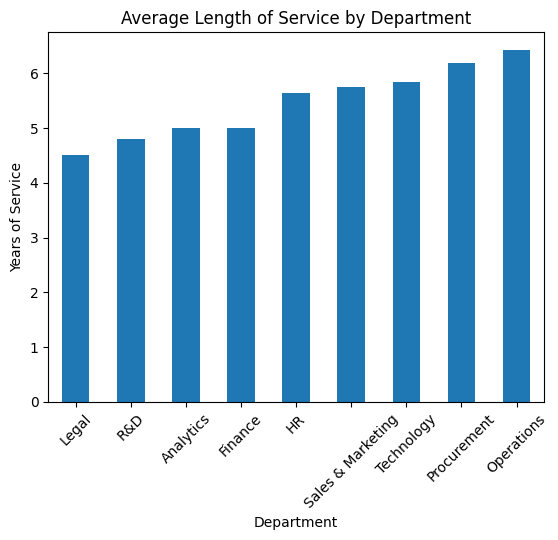

In [49]:
df.groupby('department')['length_of_service'].mean().sort_values().plot(kind='bar')
plt.title('Average Length of Service by Department')
plt.xlabel('Department')
plt.ylabel('Years of Service')
plt.xticks(rotation=45)
plt.show()


---
## 8. Final Conclusion

This HR Analytics project analyzed employee performance and retention trends to identify key improvement areas. The findings show that performance is influenced more by skill alignment, training effectiveness, and departmental workload than by education level or years of service.

### 📌 Key Takeaways
- **Performance:** Only ~35% of employees meet KPI expectations, with highest success seen in referred hires and employees with stronger training scores.
- **Training Impact:** Higher training score slightly improves KPI, but increasing the number of trainings does not guarantee performance — quality matters more than quantity.
- **Retention Patterns:** Retention does not equal performance. High performers and award winners leave sooner, suggesting unmet growth opportunities or workload pressure.
- **Department Insights:** Operations and Procurement show longer service stability, while Legal, R&D, Analytics, and Finance have shorter tenure and may require retention strategy review.

### 🎯 Business Understanding
- The company is **recognizing performance, but not retaining performance**.
- Skill-role alignment is more important than education level for results.
- Hiring channel quality matters — referral hires show the strongest outcomes.

### 🚀 Final Statement
To improve business outcomes, the organization should prioritize skill-based development, targeted retention efforts for high performers, and strategic improvements in hiring quality. Combining recognition with growth opportunities can help increase both productivity and loyalty, leading to a more stable and high-performing workforce.


---
## End of Notebook

This completes the HR Analytics: Employee Performance & Retention Analysis project.  
All insights, visualizations, and recommendations are based on the given dataset and may vary in real business environments.

**Project Completed Successfully**

Thank you for reviewing this analysis.  